In [23]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
from pylab import rcParams
%matplotlib inline
import plotly.offline as py
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

from wrangle import get_assessment_users

pd.set_option('display.max_columns', 18)
pd.set_option('display.max_rows', 18)

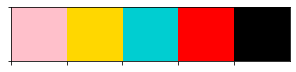

In [2]:
# Create an array with the colors you want to use
heat = [ 'pink', 'gold', 'darkturquoise', 'red', 'black']

# Set your custom color palette
my_pal = sns.color_palette(heat)

sns.palplot(my_pal)

# Create df using wrangle.py

- df contains all user logs IF they have taken an assessment.

In [3]:
df = get_assessment_users()

In [5]:
df.head(2)

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
1538,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1539,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734558 entries, 1538 to 11337825
Data columns (total 18 columns):
event_id           object
game_session       object
timestamp          datetime64[ns, UTC]
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(9)
memory usage: 1.4+ GB


# Explore df

In [9]:
df.columns

Index(['event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world', 'num_correct', 'num_incorrect', 'accuracy',
       'accuracy_group', 'date', 'hour', 'weekday'],
      dtype='object')

### Explore Types

In [10]:
df.type.unique()

array(['Clip', 'Activity', 'Game', 'Assessment'], dtype=object)

<font color=green>**Assessment Title Names:** Mushroom Sorter, Bird Measurer, Cauldron Filler, Cart Balancer, Chest Sorter.</font>

In [11]:
df[df.type == 'Assessment'].title.unique()

array(['Mushroom Sorter (Assessment)', 'Bird Measurer (Assessment)',
       'Cauldron Filler (Assessment)', 'Cart Balancer (Assessment)',
       'Chest Sorter (Assessment)'], dtype=object)

<font color=green>**Game Title Names:** 'Scrub-A-Dub', 'All Star Sorting', 'Air Show', 'Crystals Rule','Dino Drink', 'Bubble Bath', 'Dino Dive', 'Chow Time', 'Pan Balance', 'Happy Camel', 'Leaf Leader'.</font>

In [12]:
df[df.type == 'Game'].title.unique()

array(['Scrub-A-Dub', 'All Star Sorting', 'Air Show', 'Crystals Rule',
       'Dino Drink', 'Bubble Bath', 'Dino Dive', 'Chow Time',
       'Pan Balance', 'Happy Camel', 'Leaf Leader'], dtype=object)

<font color=green>**Activity Title Names:** 'Sandcastle Builder (Activity)', 'Fireworks (Activity)','Flower Waterer (Activity)', 'Bug Measurer (Activity)', 'Watering Hole (Activity)', 'Bottle Filler (Activity)', 'Chicken Balancer (Activity)', 'Egg Dropper (Activity)'.</font>

In [13]:
df[df.type == 'Activity'].title.unique()

array(['Sandcastle Builder (Activity)', 'Fireworks (Activity)',
       'Flower Waterer (Activity)', 'Bug Measurer (Activity)',
       'Watering Hole (Activity)', 'Bottle Filler (Activity)',
       'Chicken Balancer (Activity)', 'Egg Dropper (Activity)'],
      dtype=object)

<font color=green>**Clip Title Names:** 'Welcome to Lost Lagoon!', 'Magma Peak - Level 1', 'Slop Problem', 'Tree Top City - Level 1', 'Ordering Spheres', 'Costume Box', '12 Monkeys', 'Tree Top City - Level 2', "Pirate's Tale", 'Treasure Map', 'Tree Top City - Level 3', 'Rulers', 'Magma Peak - Level 2', 'Crystal Caves - Level 1', 'Balancing Act', 'Crystal Caves - Level 2', 'Crystal Caves - Level 3', 'Lifting Heavy Things', 'Honey Cake', 'Heavy, Heavier, Heaviest'.</font>

In [14]:
df[df.type == 'Clip'].title.unique()

array(['Welcome to Lost Lagoon!', 'Magma Peak - Level 1', 'Slop Problem',
       'Tree Top City - Level 1', 'Ordering Spheres', 'Costume Box',
       '12 Monkeys', 'Tree Top City - Level 2', "Pirate's Tale",
       'Treasure Map', 'Tree Top City - Level 3', 'Rulers',
       'Magma Peak - Level 2', 'Crystal Caves - Level 1', 'Balancing Act',
       'Crystal Caves - Level 2', 'Crystal Caves - Level 3',
       'Lifting Heavy Things', 'Honey Cake', 'Heavy, Heavier, Heaviest'],
      dtype=object)

### Visualize Accuracy Groups by Assessment Title

In [15]:
temp_df = df.groupby(['title', 'accuracy_group'])['accuracy_group'].agg(['count']).reset_index()
temp_df.columns = ['title', 'accuracy_group', 'Count']

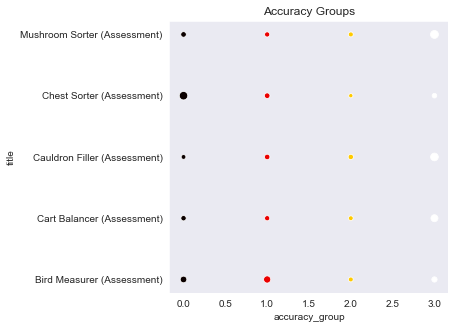

In [16]:
sns.set_style(style='dark')
plt.figure(figsize=(5,5))
fig = sns.scatterplot(data=temp_df, x='accuracy_group', y='title', hue='accuracy_group', size='Count', palette='hot', legend=False)

plt.title('Accuracy Groups')
plt.show()

In [17]:
df.groupby('accuracy_group')['installation_id'].count()

accuracy_group
0.0    255079
1.0    197291
2.0    109502
3.0    303575
Name: installation_id, dtype: int64

In [18]:
Accuracy=pd.DataFrame()
Accuracy['Type']=df.accuracy_group.value_counts().index
Accuracy['Count']=df.accuracy_group.value_counts().values

py.init_notebook_mode(connected=True)
fig = go.Figure(data=[go.Pie(labels=Accuracy['Type'], values=Accuracy['Count'],hole=0.2)])
fig.show()

### Some installation_ids have some assessments they didn't finish

In [236]:
df.groupby('type').accuracy_group.value_counts(dropna=False)

type        accuracy_group
Activity    NaN               2905496
Assessment  3.0                303575
            0.0                255079
            1.0                197291
            2.0                109502
            NaN                 38158
Clip        NaN                 90707
Game        NaN               3834750
Name: accuracy_group, dtype: int64

### How many users have event_codes 4100 and/or 4110?

In [32]:
users_4100 = list(df[df.event_code == 4100].installation_id.unique())

In [88]:
print(f'There are {len(users_4100)} unique users with event_code 4100.')

There are 3570 unique users with event_code 4100.


In [29]:
users_4110 = list(df[df.event_code == 4110].installation_id.unique())

In [89]:
print(f'There are {len(users_4110)} unique users with event_code 4110.')

There are 1836 unique users with event_code 4110.


In [80]:
users_in_both = list(set(users_4100).intersection(users_4110))

In [90]:
print(f'There are {len(users_in_both)} unique users with both event_code 4100 and 4110.')

There are 1792 unique users with both event_code 4100 and 4110.


In [82]:
either_or = users_4100 + users_4110

In [91]:
print(f'There are {len(either_or)} unique users with either 4100 or 4110 event_code.')

There are 5406 unique users with either 4100 or 4110 event_code.


### Convert timestamp column to datetime object

In [94]:
df.timestamp = pd.to_datetime(df.timestamp)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7734558 entries, 1538 to 11337825
Data columns (total 18 columns):
event_id           object
game_session       object
timestamp          datetime64[ns, UTC]
event_data         object
installation_id    object
event_count        int64
event_code         int64
game_time          int64
title              object
type               object
world              object
num_correct        float64
num_incorrect      float64
accuracy           float64
accuracy_group     float64
date               object
hour               int64
weekday            object
dtypes: datetime64[ns, UTC](1), float64(4), int64(4), object(9)
memory usage: 1.4+ GB


In [96]:
df['date'] = df['timestamp'].dt.date

In [97]:
df['hour'] = df['timestamp'].dt.hour

In [23]:
df['weekday'] = df['timestamp'].dt.weekday_name

In [98]:
df.head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
1538,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1539,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1540,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1541,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1542,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday


## Create time_series df

In [42]:
import statsmodels.api as sm

In [99]:
time_series = df.set_index(keys='timestamp')

In [100]:
time_series = time_series.sort_values(by='date')

In [101]:
time_series.head(2)

,event_id,game_session,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
timestamp,,,,,,,,,,,,,,,,,
2019-07-23 22:52:29.757000+00:00,93b353f2,50628b132a6ebb2d,"{""correct"":false,""pillars"":[1,3,2],""event_coun...",8123bc13,34,4100,28878,Chest Sorter (Assessment),Assessment,CRYSTALCAVES,1.0,1.0,0.5,2.0,2019-07-23,22,Tuesday
2019-07-23 23:07:01.042000+00:00,76babcde,9b425d845c833e87,"{""coordinates"":{""x"":565,""y"":135,""stage_width"":...",8182dff8,123,4070,177984,Dino Dive,Game,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-07-23,23,Tuesday


### What 'types' are kids doing each weekday?

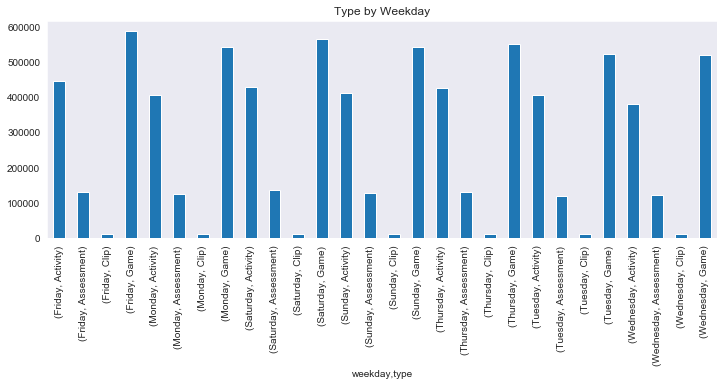

In [102]:
time_series.groupby(['weekday', 'type'])['type'].count().plot(kind='bar', figsize=(12,4))

plt.title('Type by Weekday')
plt.show()

### Avg game_time vs Median game_time by weekday

- Using the mean or median change the day with highest times per game

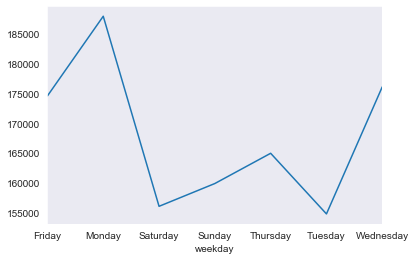

In [108]:
time_series.groupby('weekday').game_time.mean().plot()

plt.show()

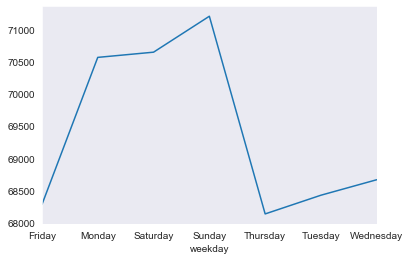

In [107]:
time_series.groupby('weekday').game_time.median().plot()

plt.show()

### game_time using total by weekday

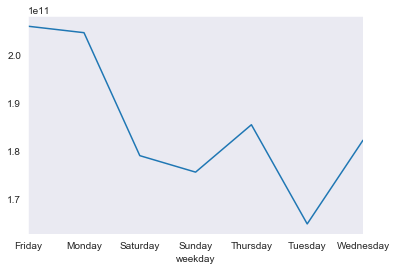

In [127]:
time_series.groupby('weekday').game_time.sum().plot()

plt.show()

In [128]:
time_series.groupby('weekday').game_time.agg(['mean','median','sum']).sort_values(by='sum',ascending=False)


,mean,median,sum
weekday,,,
Friday,174605.467935,68279,205908736226
Monday,188016.239648,70568,204565617078
Thursday,164942.590083,68133,185376172970
Wednesday,176122.697120,68665,182145212748
Saturday,156012.089910,70649,178931201990
Sunday,159851.300320,71208,175495147826
Tuesday,154733.086500,68424,164699135135


### Check game_time for anomalies

### Something's up with game_time and installation_id 86a712b8

- This id has the max game_time of 73 hours, and it's on a Monday. It is skewing the entire distribution by weekday when using mean.

installation_id
0006a69f    AxesSubplot(0.125,0.125;0.775x0.755)
0006c192    AxesSubplot(0.125,0.125;0.775x0.755)
00129856    AxesSubplot(0.125,0.125;0.775x0.755)
001d0ed0    AxesSubplot(0.125,0.125;0.775x0.755)
00225f67    AxesSubplot(0.125,0.125;0.775x0.755)
00279ac5    AxesSubplot(0.125,0.125;0.775x0.755)
002db7e3    AxesSubplot(0.125,0.125;0.775x0.755)
003372b0    AxesSubplot(0.125,0.125;0.775x0.755)
004c2091    AxesSubplot(0.125,0.125;0.775x0.755)
                            ...                 
ff3e1e35    AxesSubplot(0.125,0.125;0.775x0.755)
ff7fb595    AxesSubplot(0.125,0.125;0.775x0.755)
ff882868    AxesSubplot(0.125,0.125;0.775x0.755)
ff90db99    AxesSubplot(0.125,0.125;0.775x0.755)
ff9305d7    AxesSubplot(0.125,0.125;0.775x0.755)
ff9715db    AxesSubplot(0.125,0.125;0.775x0.755)
ffc90c32    AxesSubplot(0.125,0.125;0.775x0.755)
ffd2871d    AxesSubplot(0.125,0.125;0.775x0.755)
ffeb0b1b    AxesSubplot(0.125,0.125;0.775x0.755)
Name: game_time, Length: 3614, dtype: object

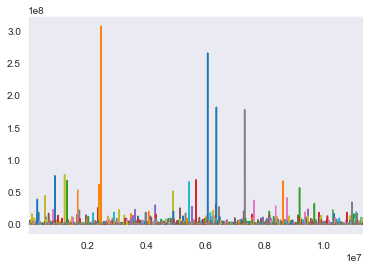

In [227]:
# Is there more than one installation_id anomaly in game_time?

df.groupby('installation_id').game_time.plot()

In [232]:
df[['installation_id', 'game_time']].sort_values('game_time', ascending=False).head(50)

,installation_id,game_time
2479711,36bd989b,306910249
2479710,36bd989b,306909710
2479709,36bd989b,306899928
6082037,86a712b8,265357457
6082038,86a712b8,265357457
6082036,86a712b8,265357457
6082035,86a712b8,265354490
6082034,86a712b8,265351007
6082033,86a712b8,265350508
...,...,...


In [245]:
Q1 = df['game_time'].quantile(q=.25)
Q3 = df['game_time'].quantile(q=.75)
IQR = Q3 - Q1

In [252]:
IQR

118640.0

In [265]:
df.game_time.value_counts(bins=8)

(-306910.25, 38363781.125]       7733960
(38363781.125, 76727562.25]          544
(230182686.75, 268546467.875]         40
(153455124.5, 191818905.625]          11
(268546467.875, 306910249.0]           3
(191818905.625, 230182686.75]          0
(115091343.375, 153455124.5]           0
(76727562.25, 115091343.375]           0
Name: game_time, dtype: int64

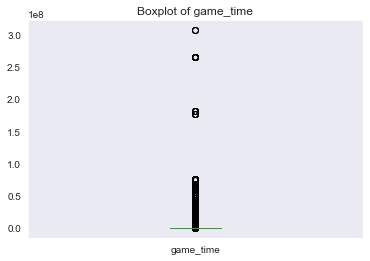

In [242]:
df.game_time.plot.box()

plt.title('Boxplot of game_time')
plt.show()

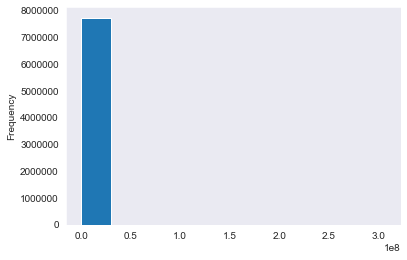

In [259]:
df.game_time.plot.hist()

In [251]:
lower = Q1 - (1.5*IQR)
lower

-148689.0

In [266]:
upper = Q3 + (1.5*IQR)
upper

325871.0

In [267]:
no_out = df[(df['game_time'] <= upper) & (df['game_time'] > 0)]

In [268]:
no_out.game_time.value_counts(bins=10)

(-321.868, 32590.7]     1936150
(32590.7, 65177.4]      1578472
(65177.4, 97764.1]      1052775
(97764.1, 130350.8]      738165
(130350.8, 162937.5]     515186
(162937.5, 195524.2]     355715
(195524.2, 228110.9]     261265
(228110.9, 260697.6]     195367
(260697.6, 293284.3]     150433
(293284.3, 325871.0]     118489
Name: game_time, dtype: int64

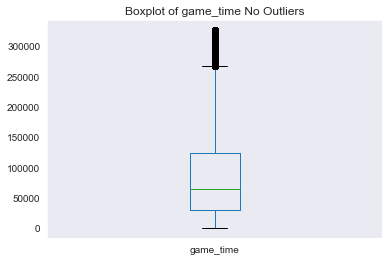

In [269]:
no_out.game_time.plot.box()

plt.title('Boxplot of game_time No Outliers')
plt.show()

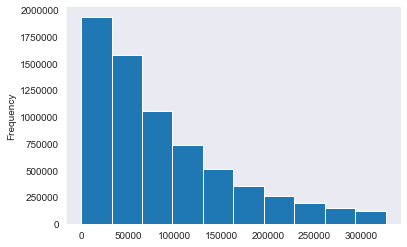

In [270]:
no_out.game_time.plot.hist()

installation_id
0006a69f    AxesSubplot(0.125,0.125;0.775x0.755)
0006c192    AxesSubplot(0.125,0.125;0.775x0.755)
00129856    AxesSubplot(0.125,0.125;0.775x0.755)
001d0ed0    AxesSubplot(0.125,0.125;0.775x0.755)
00225f67    AxesSubplot(0.125,0.125;0.775x0.755)
00279ac5    AxesSubplot(0.125,0.125;0.775x0.755)
002db7e3    AxesSubplot(0.125,0.125;0.775x0.755)
003372b0    AxesSubplot(0.125,0.125;0.775x0.755)
004c2091    AxesSubplot(0.125,0.125;0.775x0.755)
                            ...                 
ff3e1e35    AxesSubplot(0.125,0.125;0.775x0.755)
ff7fb595    AxesSubplot(0.125,0.125;0.775x0.755)
ff882868    AxesSubplot(0.125,0.125;0.775x0.755)
ff90db99    AxesSubplot(0.125,0.125;0.775x0.755)
ff9305d7    AxesSubplot(0.125,0.125;0.775x0.755)
ff9715db    AxesSubplot(0.125,0.125;0.775x0.755)
ffc90c32    AxesSubplot(0.125,0.125;0.775x0.755)
ffd2871d    AxesSubplot(0.125,0.125;0.775x0.755)
ffeb0b1b    AxesSubplot(0.125,0.125;0.775x0.755)
Name: game_time, Length: 3614, dtype: object

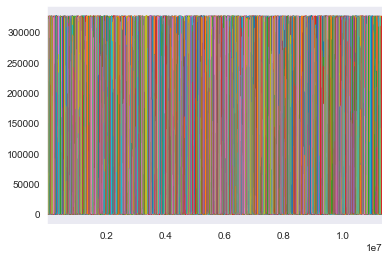

In [271]:
no_out.groupby('installation_id').game_time.plot()

### How many installation_ids are lost by removing game_time outliers?

In [276]:
df.installation_id.nunique()

3614

In [279]:
df.shape

(7734558, 18)

In [277]:
no_out.installation_id.nunique()

3614

In [280]:
df.shape

(7734558, 18)

### Avg event_count vs Median event_count by weekday

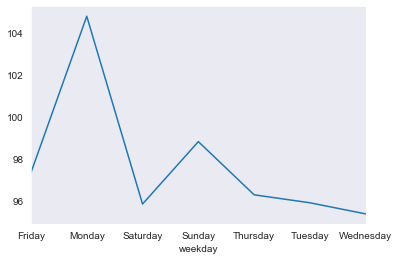

In [109]:
time_series.groupby('weekday').event_count.mean().plot()

plt.show()

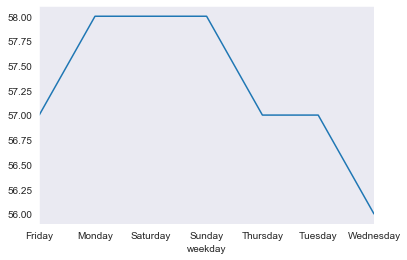

In [110]:
time_series.groupby('weekday').event_count.median().plot()

plt.show()

### What day of the week are the most users logging in?

weekday
Friday       1587
Monday       1455
Saturday     1287
Sunday       1256
Thursday     1526
Tuesday      1450
Wednesday    1434
Name: installation_id, dtype: int64


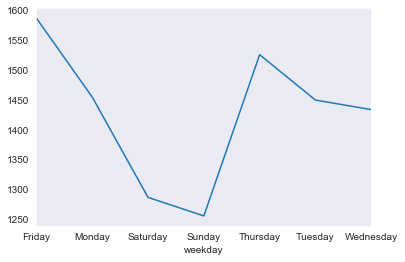

In [126]:
print(time_series.groupby('weekday').installation_id.nunique())
time_series.groupby('weekday').installation_id.nunique().plot()

### set dates

In [112]:
time_series.resample('D').sum()

,event_count,event_code,game_time,num_correct,num_incorrect,accuracy,accuracy_group,hour
timestamp,,,,,,,,
2019-07-23 00:00:00+00:00,371152,15662703,527801810,313.0,440.0,201.000000,672.0,91487
2019-07-24 00:00:00+00:00,3355907,113570024,4908459666,2096.0,18908.0,1318.533333,4334.0,522313
2019-07-25 00:00:00+00:00,4799653,188146846,7416147892,3821.0,19903.0,2538.686905,8226.0,862135
2019-07-26 00:00:00+00:00,8940006,231620910,22206818085,4999.0,15530.0,3116.489899,10464.0,960669
2019-07-27 00:00:00+00:00,5205807,227338904,6931591045,6041.0,21004.0,3868.279899,12896.0,931022
2019-07-28 00:00:00+00:00,6474188,219518243,9923308147,5566.0,33400.0,3981.334848,13097.0,807390
2019-07-29 00:00:00+00:00,7190925,277434597,10475641969,6444.0,20259.0,4508.291667,14453.0,1218313
2019-07-30 00:00:00+00:00,8785234,286094226,12052788186,5771.0,46196.0,3359.111024,11574.0,1192114
2019-07-31 00:00:00+00:00,8932944,332316776,15347178407,8032.0,34166.0,5356.894643,17735.0,1390049


### Sampled by day looking at time spent in the app.

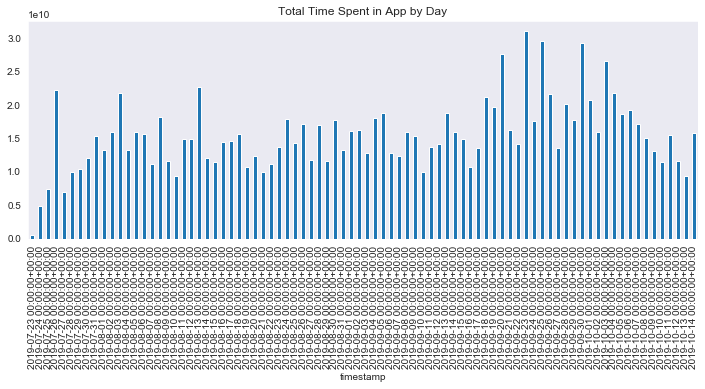

In [113]:
time_series.resample('D').game_time.sum().plot(kind='bar', figsize=(12,4))

plt.title('Total Time Spent in App by Day')
plt.show()

In [34]:
time_series[time_series.weekday == 'Monday'].game_time.idxmax()

Timestamp('2019-09-30 16:48:47.706000+0000', tz='UTC')

In [35]:
time_series.loc['2019-09-30 16:48:47.706000+0000']

event_id                                                    1f19558b
session                                             ae69051432368227
event_data         {"media_type":"animation","duration":2967,"des...
installation_id                                             86a712b8
event_count                                                       48
event_code                                                      3121
game_time                                                  265357457
title                                               All Star Sorting
type                                                            Game
world                                                    TREETOPCITY
num_correct                                                      NaN
num_incorrect                                                    NaN
accuracy                                                         NaN
accuracy_group                                                   NaN
date                              

## What is the time of day distribution by weekday?

- The distributions look similar

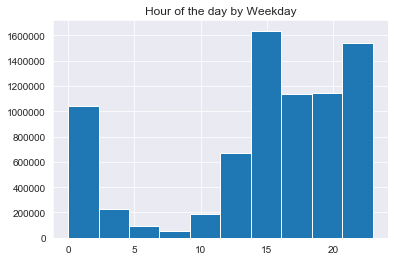

In [129]:
df.hour.hist()

plt.title('Hour of the day by Weekday')
plt.show()

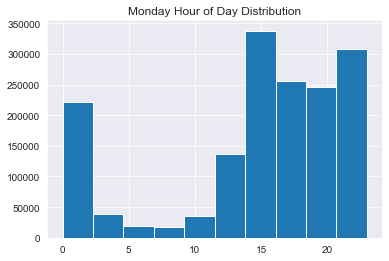

In [66]:
monday = df[df.weekday == 'Monday'].hour
monday.hist()

plt.title('Monday Hour of Day Distribution')
plt.show()

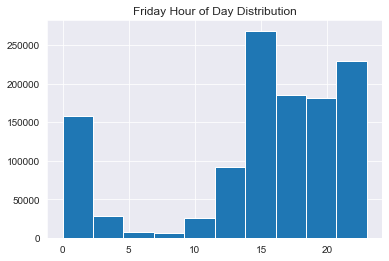

In [130]:
friday = df[df.weekday == 'Friday'].hour
friday.hist()

plt.title('Friday Hour of Day Distribution')
plt.show()

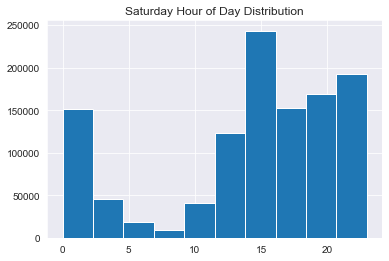

In [131]:
saturday = df[df.weekday == 'Saturday'].hour
saturday.hist()

plt.title('Saturday Hour of Day Distribution')
plt.show()

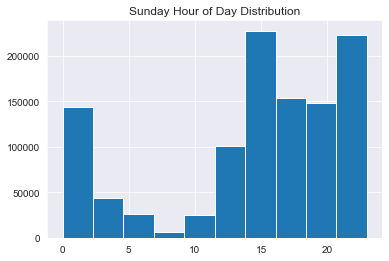

In [132]:
sunday = df[df.weekday == 'Sunday'].hour
sunday.hist()

plt.title('Sunday Hour of Day Distribution')
plt.show()

### Overall, there is an upward trend in app use.

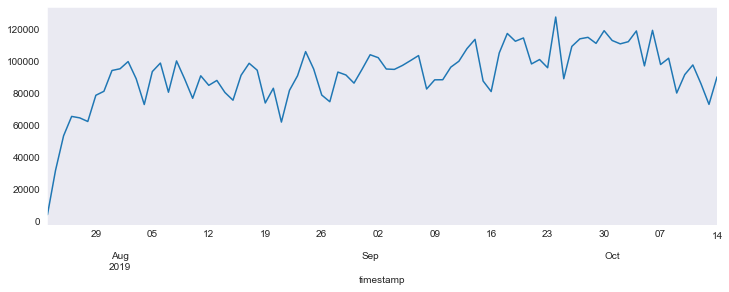

In [133]:
time_series.installation_id.resample('D').count().plot(figsize=(12,4))

plt.show()

##  How much time are users spending with different Types?

In [351]:
user = df[df.installation_id == '0006a69f']

In [355]:
user[user.weekday == 'Tuesday']

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
1538,27253bdc,34ba1a28d02ba8ba,2019-08-06 04:57:18.904000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Welcome to Lost Lagoon!,Clip,NONE,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1539,27253bdc,4b57c9a59474a1b9,2019-08-06 04:57:45.301000+00:00,"{""event_code"": 2000, ""event_count"": 1}",0006a69f,1,2000,0,Magma Peak - Level 1,Clip,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1540,77261ab5,2b9d5af79bcdb79f,2019-08-06 04:58:14.538000+00:00,"{""version"":""1.0"",""event_count"":1,""game_time"":0...",0006a69f,1,2000,0,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1541,b2dba42b,2b9d5af79bcdb79f,2019-08-06 04:58:14.615000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,2,3010,29,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1542,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:16.680000+00:00,"{""coordinates"":{""x"":273,""y"":650,""stage_width"":...",0006a69f,3,4070,2137,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1543,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:18.474000+00:00,"{""coordinates"":{""x"":863,""y"":237,""stage_width"":...",0006a69f,4,4070,3937,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1544,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:19.365000+00:00,"{""coordinates"":{""x"":817,""y"":617,""stage_width"":...",0006a69f,5,4070,4820,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1545,1bb5fbdb,2b9d5af79bcdb79f,2019-08-06 04:58:21.490000+00:00,"{""description"":""Let's build a sandcastle! Firs...",0006a69f,6,3110,6954,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
1546,1325467d,2b9d5af79bcdb79f,2019-08-06 04:58:22.732000+00:00,"{""coordinates"":{""x"":809,""y"":180,""stage_width"":...",0006a69f,7,4070,8187,Sandcastle Builder (Activity),Activity,MAGMAPEAK,NaN,NaN,NaN,NaN,2019-08-06,4,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


# game_time max by session

In [377]:
game_time_group = df.groupby(['installation_id', 'game_session','type','date'])[['game_time']].max().reset_index()


In [373]:
activity_time = game_time_group[game_time_group.type != 'Clip']

In [376]:
activity_time.shape

(85425, 5)

In [374]:
activity_time.game_time.describe()

count    8.542500e+04
mean     1.880693e+05
std      1.930431e+06
min      0.000000e+00
25%      3.693100e+04
50%      7.730900e+04
75%      1.493270e+05
max      3.069102e+08
Name: game_time, dtype: float64

In [370]:
game_time_group.game_time.describe()

count    1.761320e+05
mean     9.121465e+04
std      1.347675e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.427250e+04
max      3.069102e+08
Name: game_time, dtype: float64

In [141]:
clips = df[df.type == 'Clip']

In [224]:
clips.game_time.value_counts()

0    90707
Name: game_time, dtype: int64

In [151]:
activities = df[df.type == 'Activity']

In [152]:
games = df[df.type == 'Game']

In [153]:
assessments = df[df.type == 'Assessment']

<font color=green>**Average user time in clips by installation_id:**</font>

In [154]:
total_clip_time = clips.game_time.sum()
clip_users = clips.installation_id.nunique() 

print(f'Average user time in clips by installation_id: {round(((total_clip_time / clip_users)/60000)/60)} hours.')

Average user time in clips by installation_id: 0.0 hours.


In [155]:
clips.game_time

1538        0
1539        0
1642        0
1774        0
1775        0
1776        0
1930        0
1931        0
2016        0
           ..
11337583    0
11337584    0
11337585    0
11337586    0
11337587    0
11337588    0
11337589    0
11337590    0
11337688    0
Name: game_time, Length: 90707, dtype: int64

In [156]:
print(f'There are {clip_users} uesrs spending time viewing clips.')
print(f'Users are spending a total of {total_clip_time} milliseconds viewing clips')

There are 3584 uesrs spending time viewing clips.
Users are spending a total of 0 milliseconds viewing clips


<font color=green>**Average user time in activities by installation_id:**</font>

In [157]:
total_activity_time = activities.game_time.sum()
activity_users = activities.installation_id.nunique() 

print(f'Average user time in activities by installation_id: {round(((total_activity_time / activity_users) / 60000)/60)} hours.')

Average user time in activities by installation_id: 41.0 hours.


In [158]:
print(f'There are {activity_users} users spending time viewing clips.')

There are 3351 users spending time viewing clips.


<font color=green>**Average user time in games by installation_id:**</font>

In [159]:
total_game_time = games.game_time.sum()
game_users = games.installation_id.nunique()

print(f'Average user time in games by installation_id: {round(((total_game_time / game_users) / 60000)/60)} hours.')

Average user time in games by installation_id: 62.0 hours.


In [160]:
print(f'There are {game_users} users spending time viewing clips.')

There are 3368 users spending time viewing clips.


In [176]:
games.game_time.mean()

194853.65704048504

In [175]:
games.game_time.median()

95884.0

In [177]:
games.game_time.min()

0

In [189]:
print(f'There are {len(games[games.game_time == 0])} with game_time of 0')

There are 34527 with game_time of 0


In [185]:
print(f'{(games.game_time.max() / 60_000) / 60} hours')

73.71040472222222 hours


In [183]:
games[games.game_time == 265357457]

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
6082036,1f19558b,ae69051432368227,2019-09-30 16:48:47.706000+00:00,"{""media_type"":""animation"",""duration"":2967,""des...",86a712b8,48,3121,265357457,All Star Sorting,Game,TREETOPCITY,NaN,NaN,NaN,NaN,2019-09-30,16,Monday
6082037,2c4e6db0,ae69051432368227,2019-09-30 16:48:47.707000+00:00,"{""houses"":[5,4,3,2,1],""dinosaurs"":[{""name"":""mi...",86a712b8,49,2020,265357457,All Star Sorting,Game,TREETOPCITY,NaN,NaN,NaN,NaN,2019-09-30,16,Monday
6082038,363d3849,ae69051432368227,2019-09-30 16:48:47.707000+00:00,"{""media_type"":""animation"",""total_duration"":400...",86a712b8,50,3010,265357457,All Star Sorting,Game,TREETOPCITY,NaN,NaN,NaN,NaN,2019-09-30,16,Monday


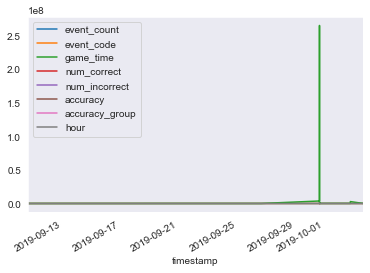

In [197]:
time_series[time_series.installation_id == '86a712b8'].plot()

<font color=green>**Average user assessments in clips by installation_id:**</font>

In [198]:
total_assessment_time = assessments.game_time.sum()
assessment_users = assessments.installation_id.nunique()

print(f'Average user time in games by installation_id: {round(((total_assessment_time / assessment_users)/60000)/60)} hours.')
                                                        

Average user time in games by installation_id: 4.0 hours.


In [199]:
print(f'There are {assessment_users} users spending time taking assessments.')

There are 3614 users spending time taking assessments.


### How many users are present at the start of the data compared to the end?

In [200]:
print(f'The first date in the logs is {time_series.index.min()}.')

The first date in the logs is 2019-07-23 14:38:25.256000+00:00.


In [201]:
print(f'The last date in the logs is {time_series.index.max()}.')

The last date in the logs is 2019-10-14 21:57:26.930000+00:00.


### Titles

In [209]:
from wordcloud import WordCloud

In [208]:
types = ' '.join(df.type)

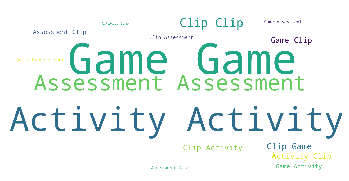

In [221]:
img = WordCloud(background_color='white', scale=4).generate(types)

plt.imshow(img)
plt.axis('off')
plt.show()

## Feature Engineering

### Create first_access, last_access, and duration cols

In [293]:
dates_df = time_series.groupby('installation_id').date.agg(['min', 'max']).reset_index()

#### Convert first and last access cols to datetime

In [296]:
dates_df['min'] = pd.to_datetime(dates_df['min'])

In [297]:
dates_df['max'] = pd.to_datetime(dates_df['max'])

### Create date_diff col

In [299]:
dates_df['duration'] = dates_df['max'] - dates_df['min']

In [312]:
dates_df['days'] = dates_df.duration.dt.days

In [313]:
dates_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3614 entries, 0 to 3613
Data columns (total 5 columns):
installation_id    3614 non-null object
min                3614 non-null datetime64[ns]
max                3614 non-null datetime64[ns]
duration           3614 non-null timedelta64[ns]
days               3614 non-null int64
dtypes: datetime64[ns](2), int64(1), object(1), timedelta64[ns](1)
memory usage: 141.2+ KB


In [338]:
dur_0 = list(dates_df[dates_df.days == 0].installation_id)

In [339]:
dur_0

['00634433',
 '00a53963',
 '00b9d8e6',
 '01d5e1f5',
 '02490b06',
 '026e3733',
 '027b3c4c',
 '02875dc2',
 '0293ae74',
 '02cdd48e',
 '02e76f43',
 '03d15b59',
 '03e38765',
 '040dbdbe',
 '0413ae4a',
 '0478b042',
 '04d77ef2',
 '04de2aae',
 '04f2cf8f',
 '04f8b246',
 '04fbee62',
 '051bc5a5',
 '053e6353',
 '0607efb8',
 '063405ff',
 '0688471f',
 '06e6a3e3',
 '077173b2',
 '07921f07',
 '07be824e',
 '07c25408',
 '08062502',
 '0864d9a2',
 '088caf6e',
 '08a47256',
 '0938a8eb',
 '099a3ab8',
 '09bbf58e',
 '0a0b1178',
 '0b51fa75',
 '0b6d68e5',
 '0b80b297',
 '0b9885aa',
 '0bb3bb7f',
 '0bbdf324',
 '0be4126e',
 '0bf95a69',
 '0c11e6a6',
 '0cb56246',
 '0cc2a247',
 '0cd05f81',
 '0d09ed83',
 '0d230220',
 '0d5a0603',
 '0db380b1',
 '0e02f80d',
 '0e1506ef',
 '0ed88e7d',
 '0f07e13a',
 '0fa3edde',
 '0fbc47c6',
 '1001b649',
 '1091d87b',
 '10ac4a88',
 '110da640',
 '114a661c',
 '117a6053',
 '11bde99b',
 '11c7b926',
 '11ec8e57',
 '12356ffe',
 '12887b75',
 '12a9a35e',
 '12c8ca47',
 '13655d9a',
 '1365c3d1',
 '13e4f56d',

In [348]:
no_out[no_out.installation_id == '00634433'].head()

,event_id,game_session,timestamp,event_data,installation_id,event_count,event_code,game_time,title,type,world,num_correct,num_incorrect,accuracy,accuracy_group,date,hour,weekday
25274,f93fc684,aed1a0caf9bfcdb3,2019-10-09 20:30:17.513000+00:00,"{""coordinates"":{""x"":532,""y"":682,""stage_width"":...",00634433,2,4010,2278,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-10-09,20,Wednesday
25275,7ec0c298,aed1a0caf9bfcdb3,2019-10-09 20:30:19.778000+00:00,"{""description"":""It's Chow Time! We have some V...",00634433,3,3010,4545,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-10-09,20,Wednesday
25276,0d1da71f,aed1a0caf9bfcdb3,2019-10-09 20:30:30.155000+00:00,"{""description"":""It's Chow Time! We have some V...",00634433,4,3110,14930,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-10-09,20,Wednesday
25277,63f13dd7,aed1a0caf9bfcdb3,2019-10-09 20:30:30.161000+00:00,"{""dinosaur"":""leslie"",""diet"":""herbivore"",""targe...",00634433,5,2020,14930,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-10-09,20,Wednesday
25278,7ec0c298,aed1a0caf9bfcdb3,2019-10-09 20:30:30.163000+00:00,"{""description"":""To make the sure dinosaur eats...",00634433,6,3010,14930,Chow Time,Game,CRYSTALCAVES,NaN,NaN,NaN,NaN,2019-10-09,20,Wednesday


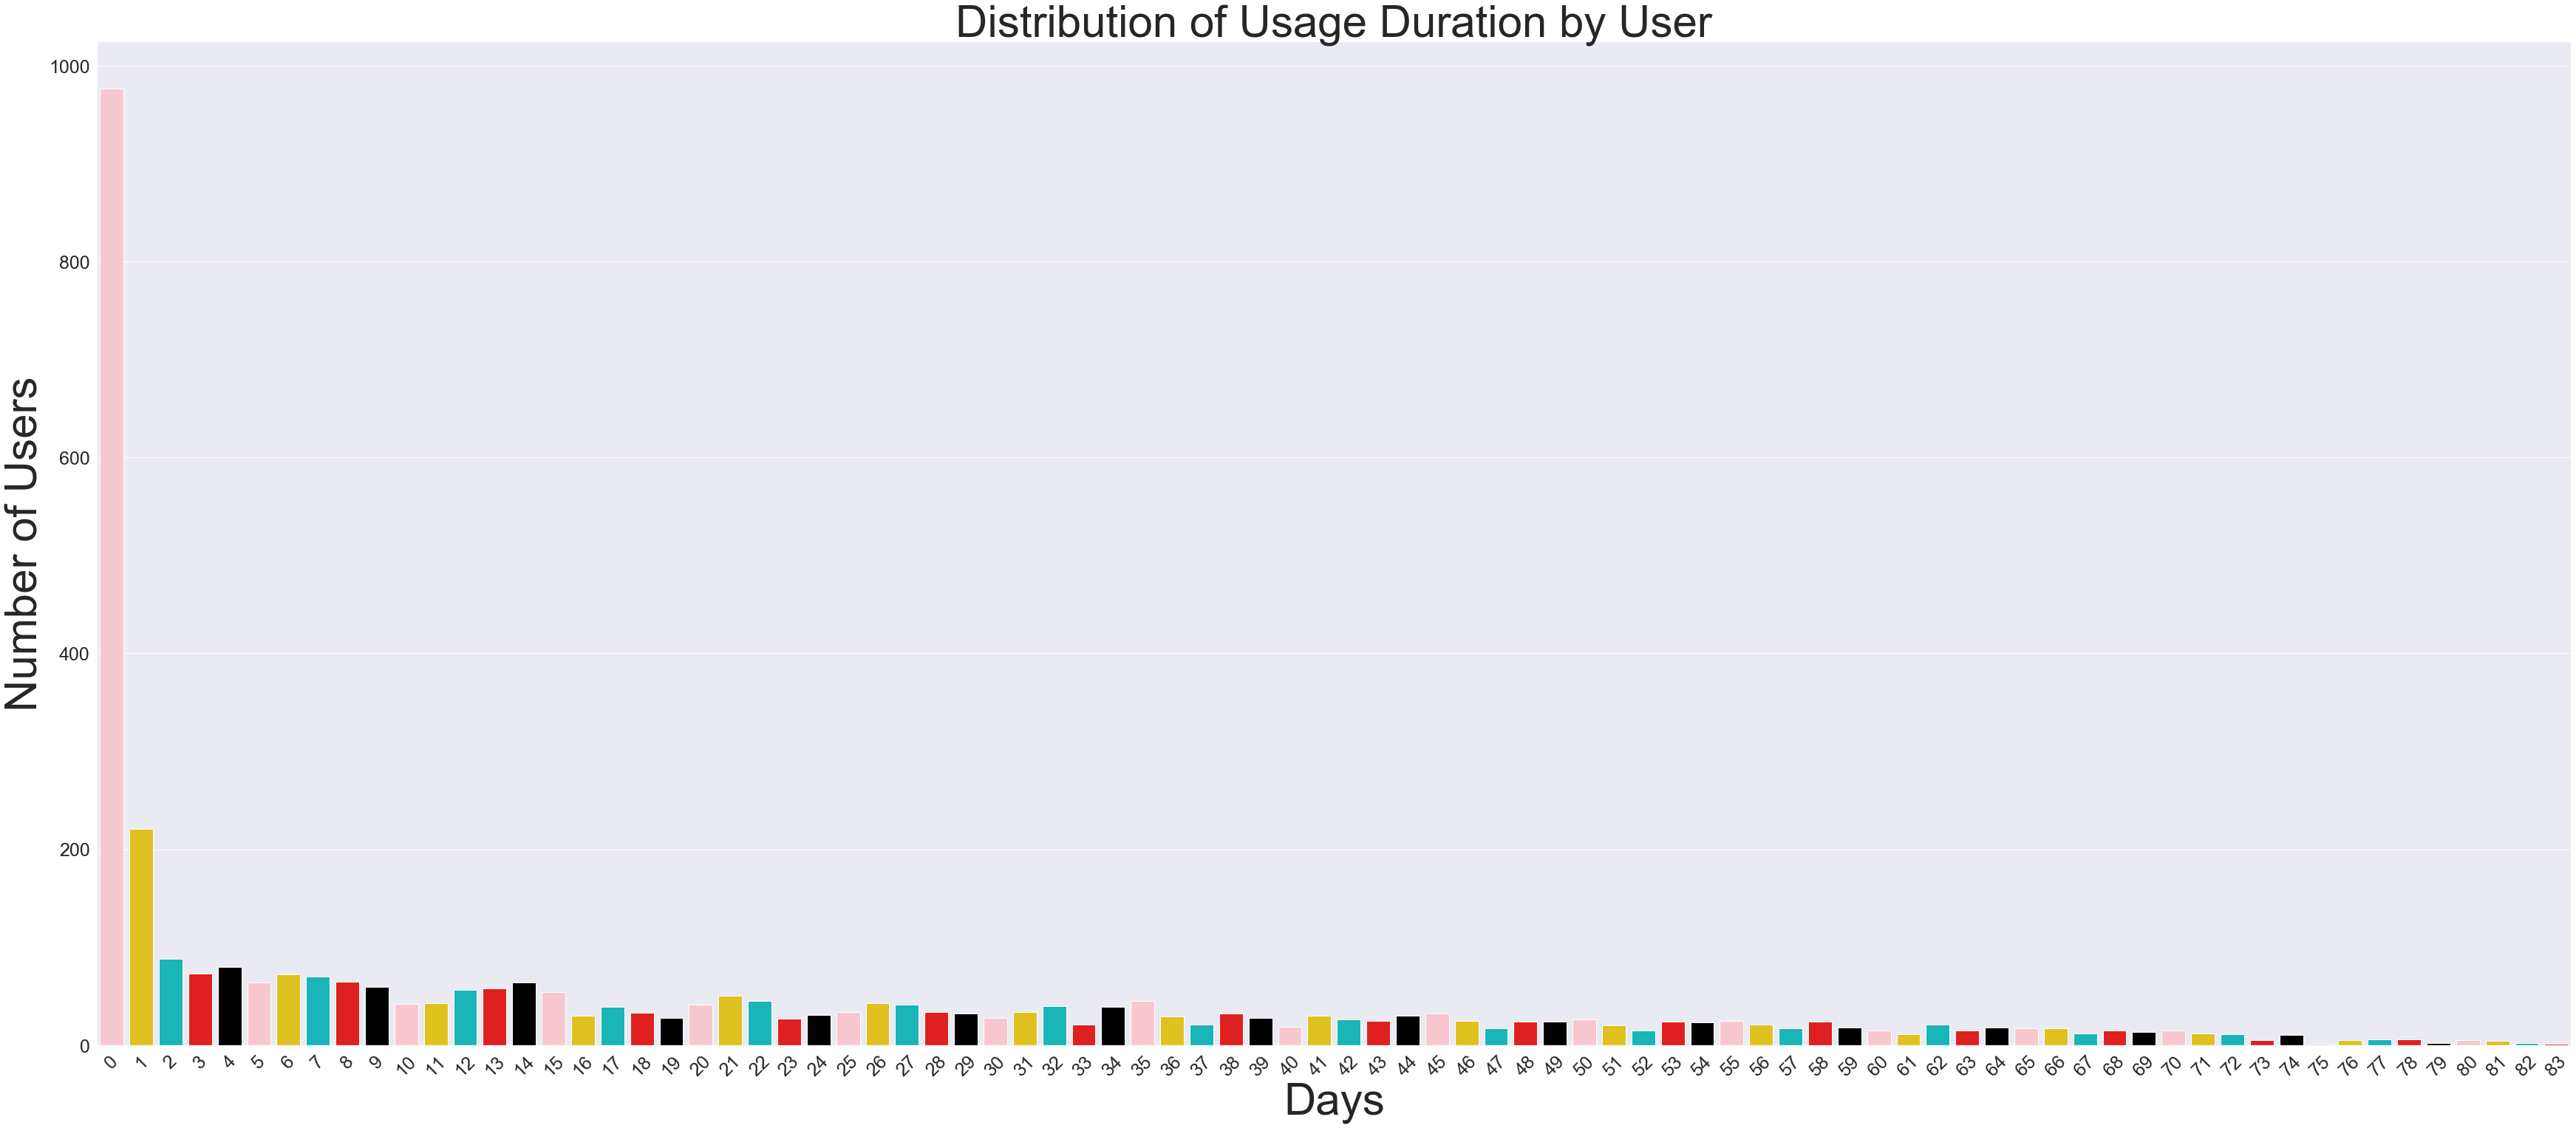

In [334]:
plt.figure(figsize=(60,25))

sns.countplot(data=dates_df, x='days', palette=my_pal)

plt.tick_params(axis='x', labelsize=25)
plt.tick_params(axis='y', labelsize=25)
plt.xticks(rotation=45)
sns.set(font_scale=5)

plt.xlabel('Days')
plt.ylabel('Number of Users')
plt.title('Distribution of Usage Duration by User')
plt.show()

In [343]:
dur_0_df = time_series[time_series.installation_id.isin(dur_0)]

In [347]:
dur_0_df.type.value_counts(dropna=False)

Game          305930
Activity      241487
Assessment    107406
Clip            7836
Name: type, dtype: int64